### Word Embeddings for NLP and Analysis

* Using Spam dataset implementing DL models and Algorithms dataset.

* Use any word embedding technique and Implement a RNN to do sentiment analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#Load data using Pandas
df = pd.read_csv('spam.csv',encoding='ISO-8859-1',na_filter=True)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['v1']=le.fit_transform(df['v1'])

In [5]:
# train test split
from sklearn.model_selection import train_test_split
sentences = df['v2'].values
y = df['v1'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=10)

# Word Embedding using TFIDF vectorizer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train).toarray()
X_test  = vectorizer.transform(sentences_test).toarray()
print(y.shape)

(5572,)


In [7]:
print("Train set size: {}".format(X_train.shape))
print("Test set size: {}".format(X_test.shape))

Train set size: (4179, 7509)
Test set size: (1393, 7509)


# Label Encoding

In [8]:
from tensorflow.keras.utils import to_categorical
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model building

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization,Dropout

In [10]:
model=Sequential()
model.add(Dense(512,input_shape=(X_train.shape[1],),activation='sigmoid'))
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(2,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3845120   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
131/131 [==============================] - 6s 32ms/step - loss: 0.6237 - accuracy: 0.6992
Epoch 2/10
131/131 [==============================] - 4s 31ms/step - loss: 0.2946 - accuracy: 0.8830
Epoch 3/10
131/131 [==============================] - 4s 31ms/step - loss: 0.1613 - accuracy: 0.9426
Epoch 4/10
131/131 [==============================] - 5s 37ms/step - loss: 0.1037 - accuracy: 0.9663
Epoch 5/10
131/131 [==============================] - 4s 31ms/step - loss: 0.0724 - accuracy: 0.9749
Epoch 6/10
131/131 [==============================] - 4s 31ms/step - loss: 0.0513 - accuracy: 0.9837
Epoch 7/10
131/131 [==============================] - 4s 30ms/step - loss: 0.0384 - accuracy: 0.9883
Epoch 8/10
131/131 [==============================] - 4s 31ms/step - loss: 0.0318 - accuracy: 0.9888
Epoch 9/10
131/131 [==============================] - 4s 31ms/step - loss: 0.0317 - accuracy: 0.9914
Epoch 10/10
131/131 [==============================] - 4s 32ms/step - loss: 0.0246 - accura

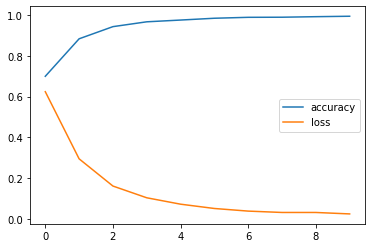

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()

In [15]:
hist=model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 10ms/step - loss: 0.0784 - accuracy: 0.9878


### Comparing RNN and LSTM on news-aggregator-dataset





In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM,SimpleRNN , Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [28]:
data = pd.read_csv('uci-news-aggregator.csv')
data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [29]:
data.CATEGORY.value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

In [30]:
num_of_categories = 45000
shuffled = data.reindex(np.random.permutation(data.index))
e = shuffled[shuffled['CATEGORY'] == 'e'][:num_of_categories]
b = shuffled[shuffled['CATEGORY'] == 'b'][:num_of_categories]
t = shuffled[shuffled['CATEGORY'] == 't'][:num_of_categories]
m = shuffled[shuffled['CATEGORY'] == 'm'][:num_of_categories]
data_new= pd.concat([e,b,t,m], ignore_index=True)
data_new.CATEGORY.value_counts()

e    45000
b    45000
t    45000
m    45000
Name: CATEGORY, dtype: int64

In [31]:
from nltk import word_tokenize
data = data_new['TITLE'].map(word_tokenize).values
total_vocabulary = set(word.lower() for title in data for word in title) 
print('There are {} unique words in the dataset.'.format(len(total_vocabulary)))
print('There are {} unique titles in the dataset.'.format(len(data)))

There are 53703 unique words in the dataset.
There are 180000 unique titles in the dataset.


In [32]:
# set the category as our target
target = data_new['CATEGORY']

# use one hot encoding since our target is categorical
y = pd.get_dummies(target).values

# use keras to create a Tokenizer object
tokenizer = text.Tokenizer(num_words=20000)  # limit to the num_words most important ones
tokenizer.fit_on_texts(list(data_new['TITLE']))
tokenized_texts = tokenizer.texts_to_sequences(data_new['TITLE'])
X = sequence.pad_sequences(tokenized_texts, maxlen=100)

# Model Building (simple RNN)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create my NN model
model1 = Sequential()
embedding_size = 128
model1.add(Embedding(len(total_vocabulary), embedding_size))
model1.add(SimpleRNN (25, return_sequences=True))
model1.add(GlobalMaxPool1D())
model1.add(Dropout(0.5))
model1.add(Dense(50, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(50, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='softmax'))  # use 4 because we have 4 categories

In [34]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         6873984   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 25)          3850      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 25)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_7 (Dropout)         (None, 25)                0         
                                                                 
 dense_8 (Dense)             (None, 50)                1300      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                      

In [35]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
history=model1.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
450/450 [==============================] - 67s 146ms/step - loss: 0.9560 - accuracy: 0.5668 - val_loss: 0.3186 - val_accuracy: 0.8897
Epoch 2/10
450/450 [==============================] - 66s 146ms/step - loss: 0.3572 - accuracy: 0.8914 - val_loss: 0.2500 - val_accuracy: 0.9195
Epoch 3/10
450/450 [==============================] - 65s 145ms/step - loss: 0.2604 - accuracy: 0.9236 - val_loss: 0.2619 - val_accuracy: 0.9145
Epoch 4/10
450/450 [==============================] - 65s 145ms/step - loss: 0.2204 - accuracy: 0.9352 - val_loss: 0.2527 - val_accuracy: 0.9218
Epoch 5/10
450/450 [==============================] - 65s 145ms/step - loss: 0.1931 - accuracy: 0.9426 - val_loss: 0.2601 - val_accuracy: 0.9218
Epoch 6/10
450/450 [==============================] - 66s 147ms/step - loss: 0.1728 - accuracy: 0.9483 - val_loss: 0.2661 - val_accuracy: 0.9215
Epoch 7/10
450/450 [==============================] - 66s 147ms/step - loss: 0.1592 - accuracy: 0.9526 - val_loss: 0.2984 - val_ac

In [37]:
from sklearn.metrics import accuracy_score
y_pred = model1.predict(X_test) # get our predictions
y_pred = (y_pred > 0.5) 
acc = accuracy_score(y_test, y_pred) 
print('Overall accuracy of RNN: {:.3f}'.format(acc))

Overall accuracy of RNN: 0.907


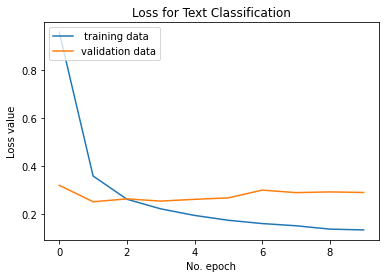

In [38]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

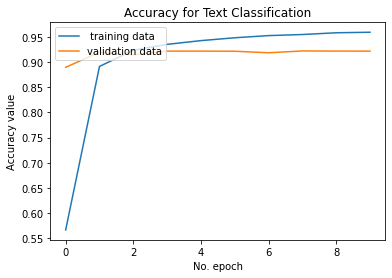

In [39]:
plt.plot(history.history['accuracy'], label=' training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Model Building (LSTM)

In [40]:
model2 = Sequential()
embedding_size=128
model2.add(Embedding(len(total_vocabulary), embedding_size))
model2.add(Dropout(0.5))
model2.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model2.add(Dense(4, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())
history=model2.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         6873984   
                                                                 
 dropout_10 (Dropout)        (None, None, 128)         0         
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_11 (Dense)            (None, 4)                 260       
                                                                 
Total params: 6,923,652
Trainable params: 6,923,652
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
450/450 [==============================] - 290s 640ms/step - loss: 0.6020 - accuracy: 0.7677 - val_loss: 0.2469 - val_accuracy: 0.9170
Epoch 2/10
450/450 [=====

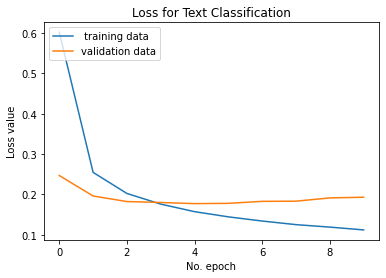

In [41]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

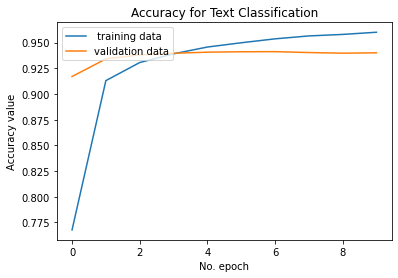

In [42]:
plt.plot(history.history['accuracy'], label=' training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

The validation accuracy of LSTM slightly better than simple RNN.
RNN have more Validation loss than LSTM
For This Dataset LSTM is performing Better.